In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

mushrooms = pd.read_csv('mr_cleaned.csv')

In [33]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,e,s,s,w,w,o,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,c,s,s,w,w,o,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,c,s,s,w,w,o,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,e,s,s,w,w,o,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,e,s,s,w,w,o,e,n,a,g


In [34]:
mushrooms.shape

(5631, 20)

In [35]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
count,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631
unique,2,5,3,8,2,7,2,2,9,2,4,4,4,6,6,3,4,6,6,6
top,e,x,y,g,t,n,c,b,p,t,b,s,s,w,w,o,p,n,v,d
freq,3488,2840,2211,1696,3179,2763,4620,4940,1384,2880,3771,3731,3539,3131,3083,5475,3483,1920,2160,2492


In [14]:
mushrooms.corr

<bound method DataFrame.corr of      class cap-shape cap-surface cap-color bruises odor gill-spacing  \
0        p         x           s         n       t    p            c   
1        e         x           s         y       t    a            c   
2        e         b           s         w       t    l            c   
3        p         x           y         w       t    p            c   
4        e         x           s         g       f    n            w   
...    ...       ...         ...       ...     ...  ...          ...   
5626     e         b           y         n       f    n            c   
5627     e         x           y         n       f    n            c   
5628     e         x           y         g       t    n            c   
5629     p         x           y         c       f    m            c   
5630     p         f           y         c       f    m            c   

     gill-size gill-color stalk-shape  ... stalk-surface-above-ring  \
0            n          k       

Mark：先相关性分析看？

## 1. Cap项 因为相关性太低了，故删去
# Bruise 单纯的t f 保留但不分析
odor 饼图
Gill 热力
Stalk相关性分析
Ring 热力
四个color单独分析
population habitate 散点
standarize？

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

In [38]:
#Odor 相关性太强了，经过分析去掉了

In [ ]:
#接下来是gill的热力图

In [40]:
mushrooms=mushrooms.drop(['odor'],axis=1)

In [130]:
mushrooms.shape

(5631, 19)

In [67]:
color=[]
all=[]
gill_space=['c','w']
gill_size=['b','n']
gill_color=['g','h','k','n','p','u','r','w']
for c in gill_color:
    cat=mushrooms[(mushrooms['gill-spacing']=='w' )&(mushrooms['gill-size']=='n' )&(mushrooms['gill-color']==c)]

    p=cat[(cat['class']=='p')]
    if cat.shape[0]!=0:
        rate=p.shape[0]/cat.shape[0]
    if cat.shape[0]==0:
        rate=''
    color.append(rate)
print(color)


[1.0, '', '', 0.42857142857142855, 0.42857142857142855, 1.0, '', 0.03614457831325301]


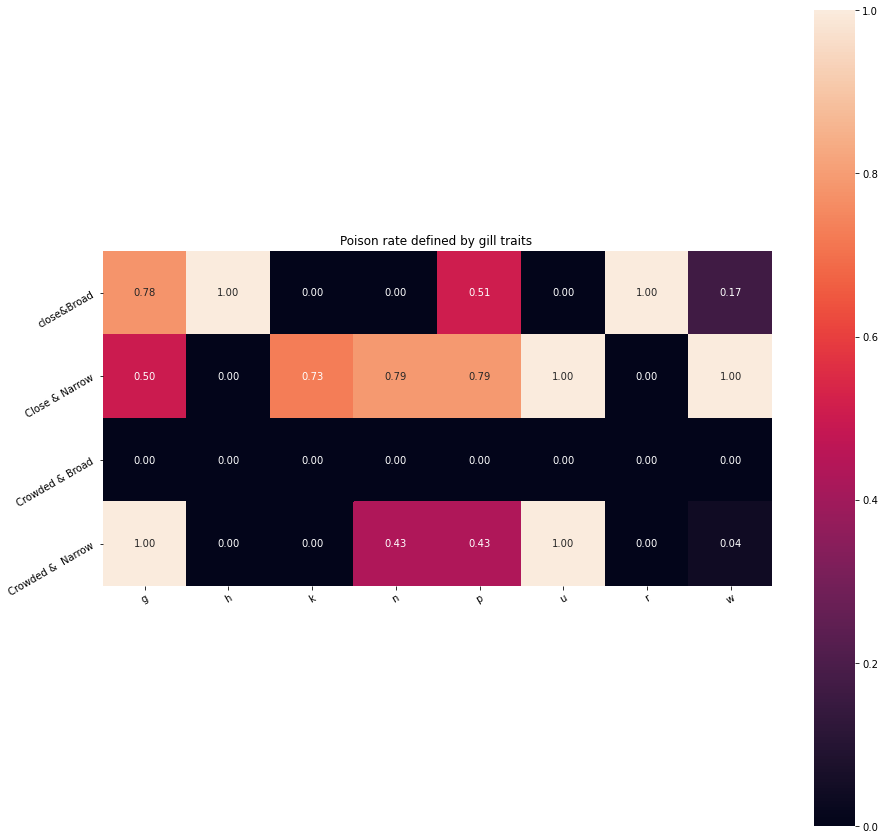

In [186]:
import seaborn as sns
plt.figure(figsize=(15,15))
gill=[[0.78, 1.0, 0.0, 0.0, 0.51, 0.0, 1.0, 0.17],
[0.5, 0, 0.73, 0.79, 0.79, 1.0, 0, 1.0],
[0 , 0.0, 0.0, 0.0, 0.0,0 , 0 , 0 ],
[1.0, 0, 0, 0.43, 0.43, 1.0, 0, 0.04] ]
#a=sns.heatmap(ring_type, yticklabels=False, cbar=False, cmap='viridis')
a = sns.heatmap(gill, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_yticklabels(['close&Broad','Close & Narrow','Crowded & Broad','Crowded &  Narrow'], rotation=30)
a.set_xticklabels(['g','h','k','n','p','u','r','w'], rotation=30)  
a.set_title('Poison rate defined by gill traits ')
plt.show() 


In [ ]:
#四个color分析

['v', 'y', 's', 'a', 'n', 'c']


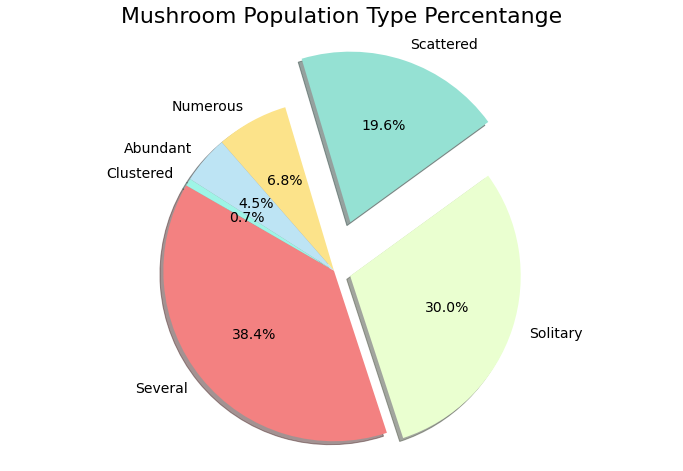

In [114]:
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_types)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0.3, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

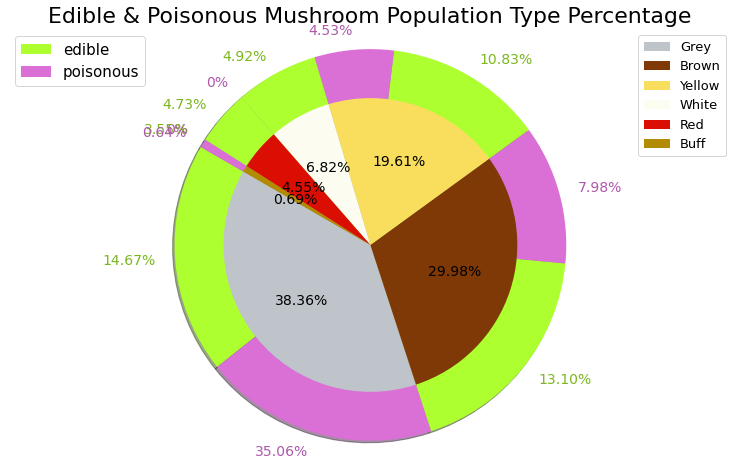

['b', 'c', 'e', 'g', 'n', 'p', 'w', 'y']
[120, 44, 588, 1696, 1164, 96, 875, 1048]


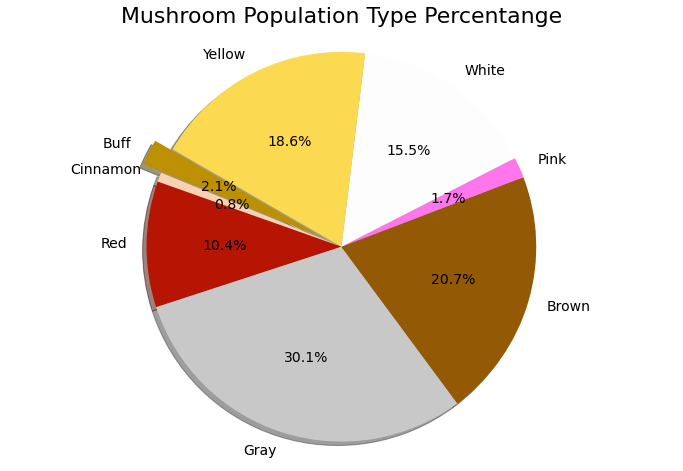

In [203]:
#cap_color = mushrooms['cap-color'].value_counts()
cap_color = mushrooms['cap-color'].value_counts().sort_index()
cap_color_size = cap_color.values.tolist() #Provides numerical values
cap_color_types = cap_color.axes[0].tolist() #Converts index labels object to list
print(cap_color_types)
print(cap_color_size)
# Data to plot
cap_color_labels = 'Buff', 'Cinnamon', 'Red', 'Gray', 'Brown', 'Pink','White','Yellow'
colors = ['#BD9002','#FBD1B1','#B71504','#C9C8C8','#935905','#FF76EC','#FEFDFE','#FBD950']
explode = (0.1, 0, 0, 0, 0, 0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(cap_color_size, explode=explode, labels=cap_color_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[0, 32, 576, 888, 1024, 8, 560, 400]
[120, 12, 12, 808, 140, 88, 315, 648]
[0, 120, 32, 12, 576, 12, 888, 808, 1024, 140, 8, 88, 560, 315, 400, 648]


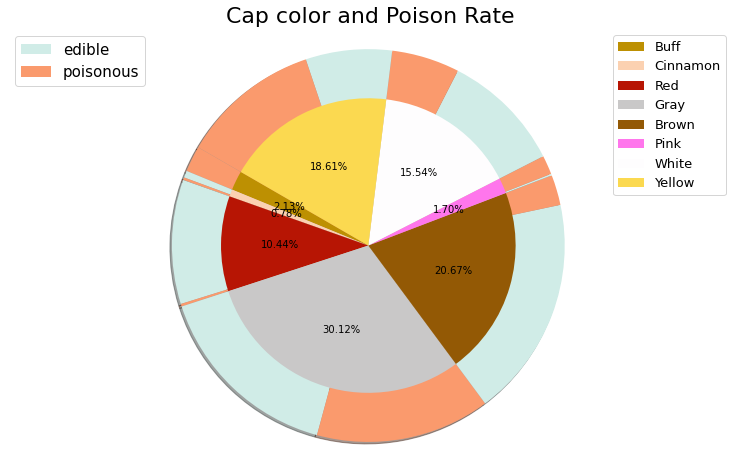

In [204]:
#DOUBLE PIE CHART
poisonous_cap = [] #Poisonous population type list
edible_cap = []    #Edible population type list
for cap in cap_color_types: 
    size = len(mushrooms[mushrooms['cap-color'] == cap].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == cap) & (mushrooms['class'] == 'e')].index)
    edible_cap.append(edibles) #Gets edibles
    poisonous_cap.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_cap)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_cap[i])
    combine_ed_poi.append(poisonous_cap[i])
print(edible_cap) 
print(poisonous_cap) 
print(combine_ed_poi)

#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Cap color and Poison Rate', fontsize=22)
#percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
#                  '3.55%','0.64%','0%','0%','0%','40%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, 
                                colors=['#D0ECE7','#FA9A6D'], shadow=True, startangle=150)

for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#D0ECE7') #Color % labels with dark green
    else:
        texts1[i].set_color('#FA9A6D') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(cap_color_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(10)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, cap_color_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

In [ ]:
#Gill Color

['g', 'h', 'k', 'n', 'p', 'r', 'u', 'w', 'y']
[656, 720, 408, 984, 1384, 24, 480, 957, 18]


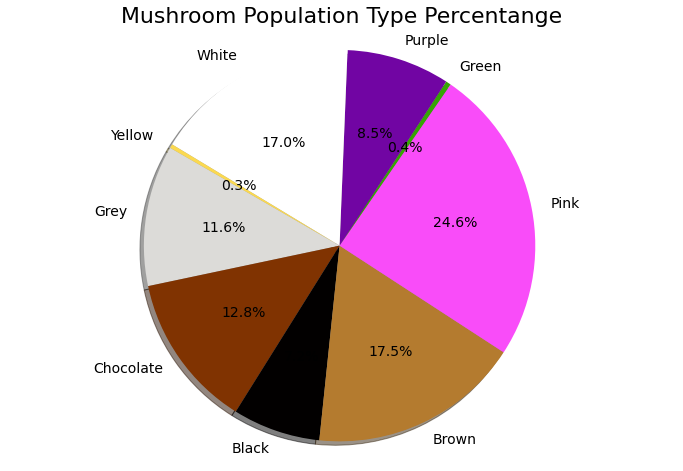

In [205]:
gill_color = mushrooms['gill-color'].value_counts().sort_index()
gill_color_size = gill_color.values.tolist() #Provides numerical values
gill_color_types = gill_color.axes[0].tolist() #Converts index labels object to list
print(gill_color_types)
print(gill_color_size)
# Data to plot
gill_color_labels = 'Grey', 'Chocolate','Black','Brown', 'Pink','Green','Purple','White','Yellow'
colors_gill = ['#DCDBD8','#803301','#020000','#B47B2F','#F94CF9','#37A305','#7105A3','#FFFFFF','#FBD950']

#explode = (0.1, 0, 0, 0, 0, 0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(gill_color_size, labels=gill_color_labels, colors=colors_gill,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[152, 192, 344, 872, 744, 0, 432, 752, 0]
[504, 528, 64, 112, 640, 24, 48, 205, 18]
[152, 504, 192, 528, 344, 64, 872, 112, 744, 640, 0, 24, 432, 48, 752, 205, 0, 18]


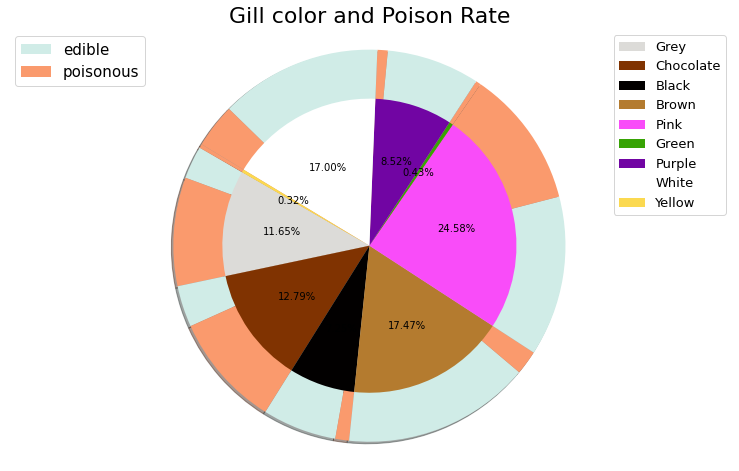

In [206]:
#DOUBLE PIE CHART
poisonous_gill = [] #Poisonous population type list
edible_gill = []    #Edible population type list
for gill in gill_color_types: 
    size = len(mushrooms[mushrooms['gill-color'] == gill].index)
    edibles = len(mushrooms[(mushrooms['gill-color'] == gill) & (mushrooms['class'] == 'e')].index)
    edible_gill.append(edibles) #Gets edibles
    poisonous_gill.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_gill)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_gill[i])
    combine_ed_poi.append(poisonous_gill[i])
print(edible_gill) 
print(poisonous_gill) 
print(combine_ed_poi)

#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Gill color and Poison Rate', fontsize=22)
#percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
#                  '3.55%','0.64%','0%','0%','0%','40%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, 
                                colors=['#D0ECE7','#FA9A6D'], shadow=True, startangle=150)

for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#D0ECE7') #Color % labels with dark green
    else:
        texts1[i].set_color('#FA9A6D') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(gill_color_size, colors=colors_gill, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(10)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, gill_color_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

['b', 'c', 'g', 'n', 'p', 'w']
[432, 36, 576, 448, 1008, 3131]


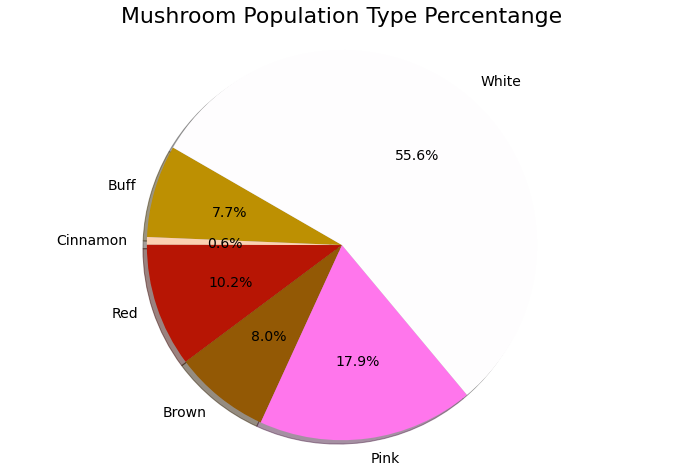

In [207]:
#stalk Color
stalk_color = mushrooms['stalk-color-above-ring'].value_counts().sort_index()
stalk_color_size = stalk_color.values.tolist() #Provides numerical values
stalk_color_types = stalk_color.axes[0].tolist() #Converts index labels object to list
print(stalk_color_types)
print(stalk_color_size)
# Data to plot
stalk_color_labels = 'Buff', 'Cinnamon', 'Red', 'Brown', 'Pink','White'
colors_stalk = ['#BD9002','#FBD1B1','#B71504','#935905','#FF76EC','#FEFDFE']
#explode = (0.1, 0, 0, 0, 0, 0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(stalk_color_size, labels=stalk_color_labels, colors=colors_stalk,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[0, 0, 576, 16, 576, 2320]
[432, 36, 0, 432, 432, 811]
[0, 432, 0, 36, 576, 0, 16, 432, 576, 432, 2320, 811]


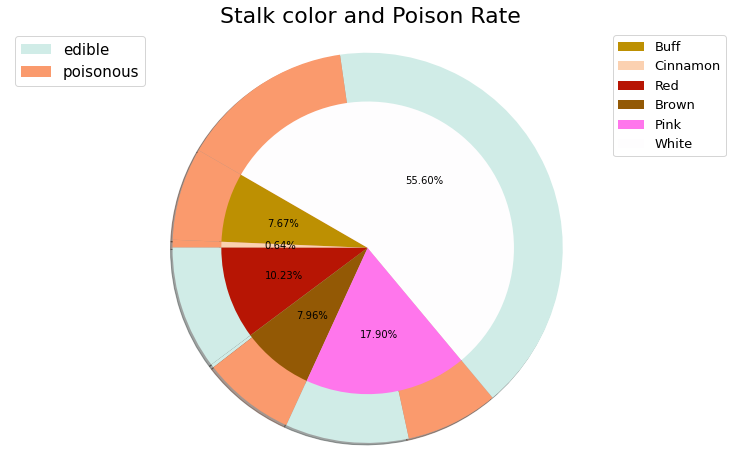

In [208]:
#DOUBLE PIE CHART
poisonous_stalk = [] #Poisonous population type list
edible_stalk = []    #Edible population type list
for stalk in stalk_color_types: 
    size = len(mushrooms[mushrooms['stalk-color-above-ring'] == stalk].index)
    edibles = len(mushrooms[(mushrooms['stalk-color-above-ring'] == stalk) & (mushrooms['class'] == 'e')].index)
    edible_stalk.append(edibles) #Gets edibles
    poisonous_stalk.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_stalk)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_stalk[i])
    combine_ed_poi.append(poisonous_stalk[i])
print(edible_stalk) 
print(poisonous_stalk) 
print(combine_ed_poi)

#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Stalk color and Poison Rate', fontsize=22)
#percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
#                  '3.55%','0.64%','0%','0%','0%','40%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, 
                                colors=['#D0ECE7','#FA9A6D'], shadow=True, startangle=150)

for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#D0ECE7') #Color % labels with dark green
    else:
        texts1[i].set_color('#FA9A6D') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(stalk_color_size, colors=colors_stalk, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(10)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, stalk_color_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

['h', 'k', 'n', 'r', 'u', 'w']
[1584, 1872, 1920, 72, 48, 135]


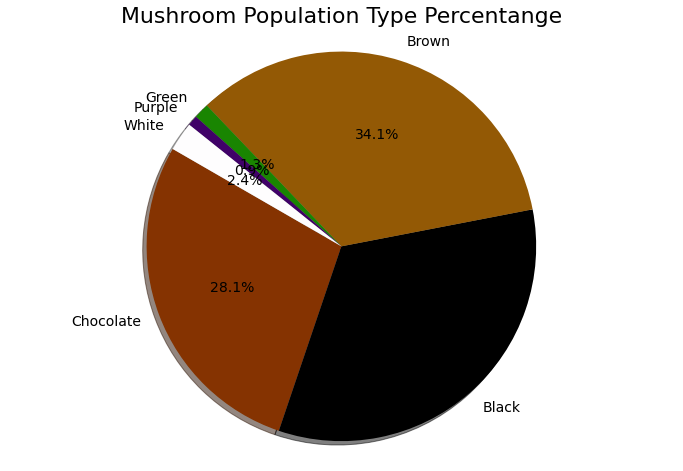

In [209]:
#spore Color
spore_color = mushrooms['spore-print-color'].value_counts().sort_index()
spore_color_size = spore_color.values.tolist() #Provides numerical values
spore_color_types = spore_color.axes[0].tolist() #Converts index labels object to list
print(spore_color_types)
print(spore_color_size)
# Data to plot
spore_color_labels = 'Chocolate', 'Black','Brown', 'Green','Purple','White'
colors_spore = ['#853301','#000000','#935905','#198501','#400168','#FEFDFE']
#explode = (0.1, 0, 0, 0, 0, 0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(spore_color_size, labels=spore_color_labels, colors=colors_spore,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[0, 1648, 1696, 0, 48, 96]
[1584, 224, 224, 72, 0, 39]
[0, 1584, 1648, 224, 1696, 224, 0, 72, 48, 0, 96, 39]


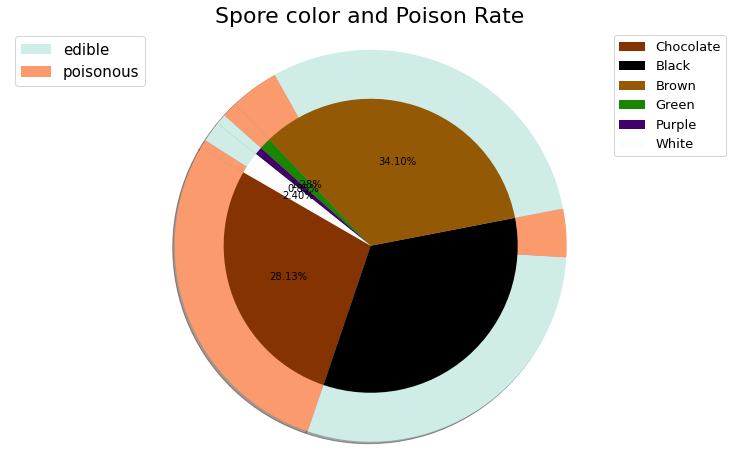

In [210]:
#DOUBLE PIE CHART spore
poisonous_spore = [] #Poisonous population type list
edible_spore = []    #Edible population type list
for spore in spore_color_types: 
    size = len(mushrooms[mushrooms['spore-print-color'] == spore].index)
    edibles = len(mushrooms[(mushrooms['spore-print-color'] == spore) & (mushrooms['class'] == 'e')].index)
    edible_spore.append(edibles) #Gets edibles
    poisonous_spore.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_stalk)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_spore[i])
    combine_ed_poi.append(poisonous_spore[i])
print(edible_spore) 
print(poisonous_spore) 
print(combine_ed_poi)

#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Spore color and Poison Rate', fontsize=22)
#percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
#                  '3.55%','0.64%','0%','0%','0%','40%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, 
                                colors=['#D0ECE7','#FA9A6D'], shadow=True, startangle=150)

for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#D0ECE7') #Color % labels with dark green
    else:
        texts1[i].set_color('#FA9A6D') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(spore_color_size, colors=colors_spore, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(10)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, spore_color_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

In [89]:
stalk=mushrooms[['class','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']]
stalk.head()

,class,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring
0,p,e,e,s,s,w,w
1,e,e,c,s,s,w,w
2,e,e,c,s,s,w,w
3,p,e,e,s,s,w,w
4,e,t,e,s,s,w,w


In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
stalks=stalk
for col in stalks.columns:
    stalks[col] = labelencoder.fit_transform(stalk[col])

<ipython-input-104-3c513d203aba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stalks[col] = labelencoder.fit_transform(stalk[col])


In [105]:
stalks.head()

,class,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring
0,1,0,2,2,2,5,5
1,0,0,1,2,2,5,5
2,0,0,1,2,2,5,5
3,1,0,2,2,2,5,5
4,0,1,2,2,2,5,5


改进：概率？棕色蘑菇本来就多

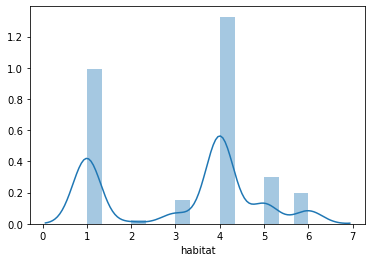

In [95]:
ph=pd.read_csv('mr_ph.csv')
sns.distplot(ph["habitat"])

In [107]:
stalk.pop('class')

0       1
1       0
2       0
3       1
4       0
       ..
5626    0
5627    0
5628    0
5629    1
5630    1
Name: class, Length: 5631, dtype: int64

[Text(0.5, 0, 'stalk-shape'),
 Text(1.5, 0, 'stalk-root'),
 Text(2.5, 0, 'stalk-surface-above-ring'),
 Text(3.5, 0, 'stalk-surface-below-ring'),
 Text(4.5, 0, 'stalk-color-above-ring'),
 Text(5.5, 0, 'stalk-color-below-ring')]

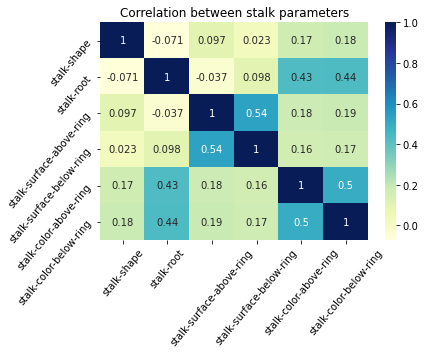

In [198]:
g=sns.heatmap(stalks.corr(),annot=True,cmap="YlGnBu")
g.set_title('Correlation between stalk parameters')
g.set_yticklabels(g.get_yticklabels(),rotation=50)
g.set_xticklabels(g.get_xticklabels(),rotation=50)

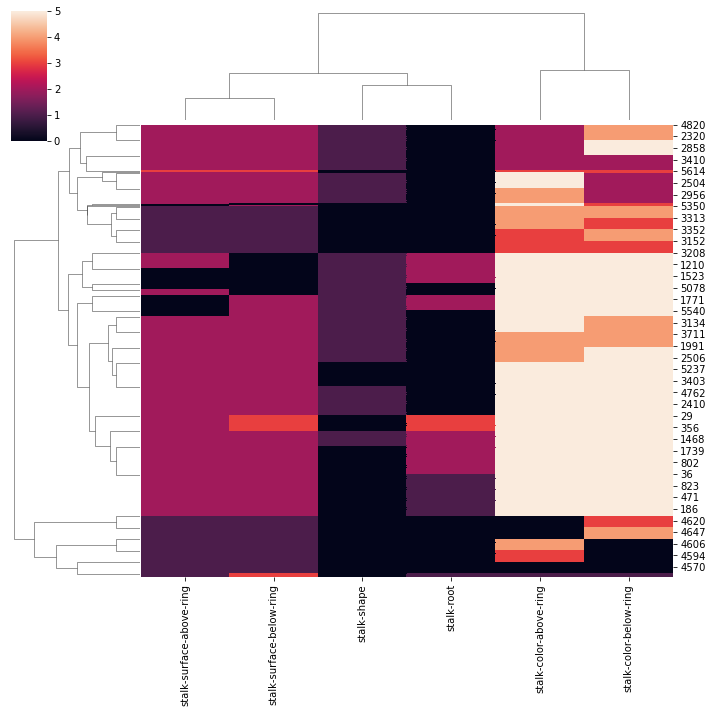

In [108]:

g = sns.clustermap(stalk)

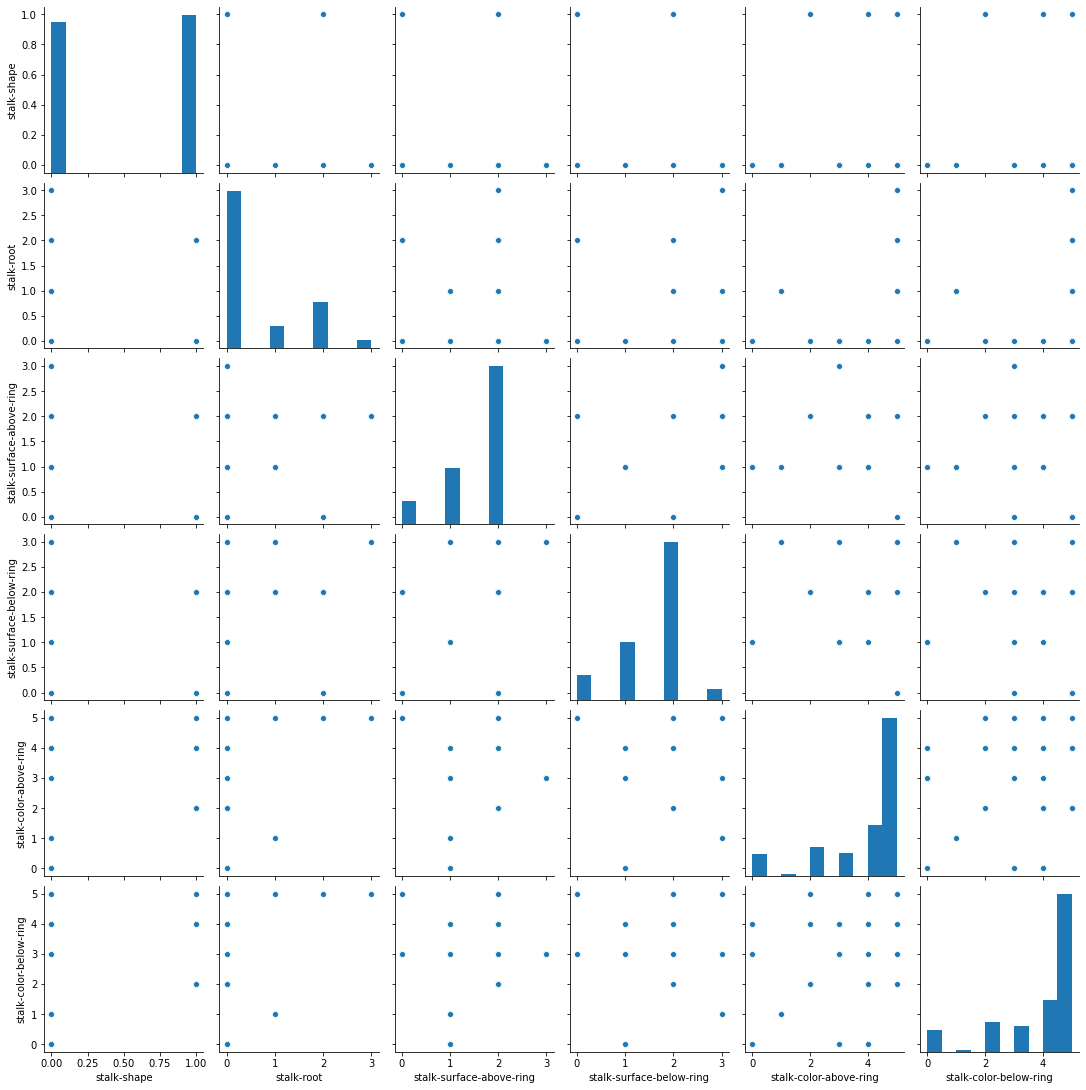

In [111]:
sns.pairplot(stalks)

In [ ]:
以下是四个单独分析